In [1]:
from FUCCIDataset import FUCCIDataset, ReferenceChannelDataset, FUCCIChannelDataset, clean_dir
from microfilm import microplot
import numpy as np

['DAPI', 'gamma-tubulin', 'Geminin', 'CDT1']
32
Channel 0: DAPI
Channel 1: gamma-tubulin
Channel 2: Geminin
Channel 3: CDT1


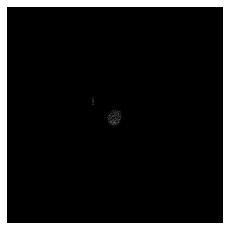

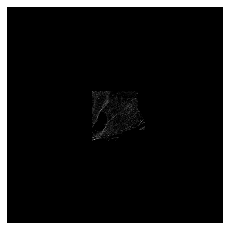

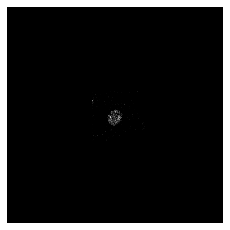

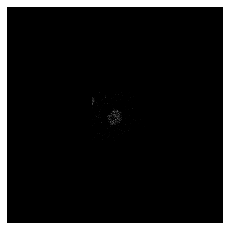

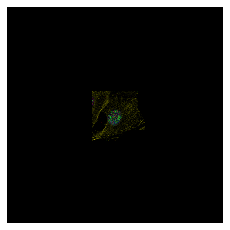

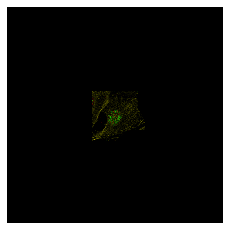

In [8]:
FUCCI_PATH = '/home/ishang/cross-modal-autoencoders/FUCCI-dev-data'
# clean_dir(FUCCI_PATH)

dataset = FUCCIDataset(data_dir=FUCCI_PATH)
print(dataset.channels)
print(len(dataset))
image = 0
for i, channel in enumerate(dataset.channels):
    print(f"Channel {i}: {channel}")
    microplot.microshow(dataset[image][i, :, :])
# cmap = ['pure_blue', 'pure_red', 'pure_yellow', 'pure_green']
cmap = ['pure_blue', 'pure_yellow', 'pure_green', 'pure_red']
# microplot.microshow(images=np.moveaxis(dataset[image], -1, 0), cmaps=cmap)
microplot.microshow(images=dataset[image], cmaps=cmap)
microplot.microshow(images=dataset[image][1:, :, ::], cmaps=cmap[1:])

(2, 2048, 2048)
(2, 2048, 2048)
(2, 2048, 2048)
(2, 2048, 2048)
(2, 2048, 2048)
(2, 2048, 2048)
(2, 2048, 2048)
(2, 2048, 2048)
(2, 2048, 2048)
(2, 2048, 2048)


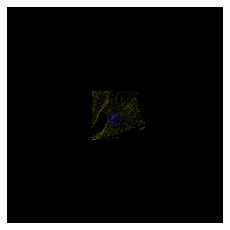

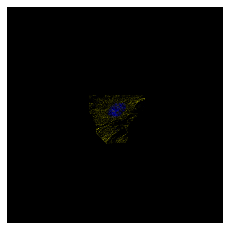

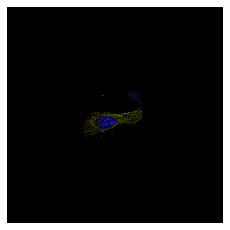

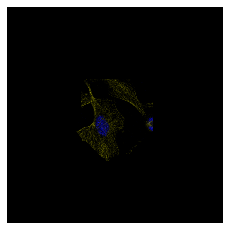

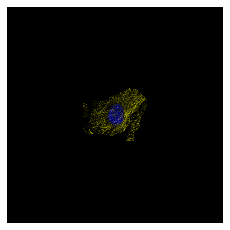

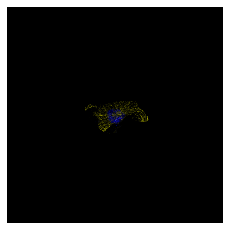

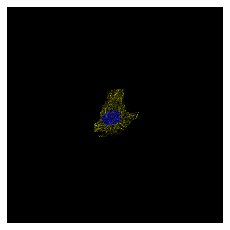

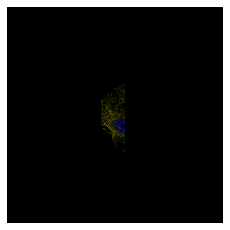

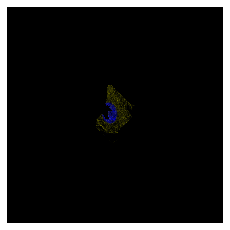

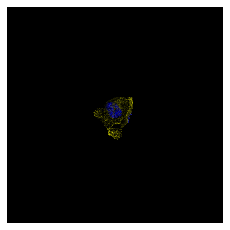

In [9]:
ref_dataset = ReferenceChannelDataset(data_dir=FUCCI_PATH)
fucci_dataset = FUCCIChannelDataset(data_dir=FUCCI_PATH)
to_display = 10
for i in range(to_display):
    print(ref_dataset[i].shape)
    microplot.microshow(images=ref_dataset[i], cmaps=cmap[:2])
    # microplot.microshow(images=np.moveaxis(fucci_dataset[i], -1, 0), cmaps=cmap[2:])
    # microplot.microshow(images=np.moveaxis(dataset[i], -1, 0), cmaps=cmap)